In [ ]:
#00_Test.ipynb
"""
- This test uses a table ./log17-event.csv, which is a slice of a larger timeseries linked list dataset  
- This which contains 3 or 4 known events.
- The use of a smaller dataset is for the early stages of development and initial exploratory data science.
The larger test set is ./log17.csv (which is itself part of a linked list)

# Human hand recorded estimates of events and percieved qualitative intensity level. (log17-test.csv) 
    17:51:55~ event?
    18:21:20~ level(10)
    18:30:00~ -large dog
    18:56:10~ level(3)
"""

In [19]:
import math
import numpy as np
import pandas as pd

In [20]:
"""
a python function which loads ./data/test.csv and prints the first ten lines
"""

def load_test_data():
    test_data = pd.read_csv('./log17.csv')
    print(test_data.head(10))

In [33]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('log17.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
print(series.head())


C:\Users\d3v\AppData\Local\Temp/ipykernel_7392/473909784.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('log17.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


                         temp   humidity   pressure      pitch      roll  \
datetime                                                                   
2022-03-02 17:43:16  55.74153   31.18224   29.57996  357.45363  12.96283   
2022-03-02 17:43:17  55.66834   31.29716   29.58000  357.45751  12.96112   
2022-03-02 17:43:18  55.79642   31.43122   29.57974  357.46773  12.95190   
2022-03-02 17:43:18  55.72323   31.81428   29.57998  357.43022  12.94720   
2022-03-02 17:43:19  55.63174   31.26524   29.58026  357.46296  12.98284   

                           yaw   accel_x   accel_y   accel_z  Unnamed: 10  
datetime                                                                   
2022-03-02 17:43:16  133.82898   0.04364   0.21900   0.93409          NaN  
2022-03-02 17:43:17  133.79274   0.04122   0.21948   0.87341          NaN  
2022-03-02 17:43:18  133.74400   0.04122   0.21754   0.93238          NaN  
2022-03-02 17:43:18  133.72637   0.04194   0.21948   0.93238          NaN  
2022-03-02 

In [ ]:
series.plot()
pyplot.show()
series.plot(style='k.')
pyplot.show()

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = read_csv('log17.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()

In [36]:
# import csv

# datetime = []
# temperature = []
# humidity = []
# pressure = []
# pitch  = []    
# roll = []
# yaw  = [] 
# accel_x =[]  
# accel_y = []  
# accel_z = [] 
# Unnamed = [] 

# with open('log17.csv', 'r') as f:
#     reader = csv.reader(f, delimiter=',')
#     columns = zip(*reader)
#     # for row in reader:
#     #     c1.append(row[0])
#     #     c2.append(row[1])
#     #     c3.append(row[2])
#     #     datetime.append(row[])
#     #     temperature.append(row[])
#     #     humidity.append(row[])
#     #     pressure.append(row[])
#     #     pitch.append(row[])
#     #     roll.append(row[])
#     #     yaw.append(row[])
#     #     accel_x.append(row[])
#     #     accel_y.append(row[])
#     #     accel_z.append(row[])
#     #     Unnamed.append(row[])
#     [print(columns)]


   datetime      temp   humidity   pressure      pitch      roll        yaw  \
0  17:43:16  55.74153   31.18224   29.57996  357.45363  12.96283  133.82898   
1  17:43:17  55.66834   31.29716   29.58000  357.45751  12.96112  133.79274   
2  17:43:18  55.79642   31.43122   29.57974  357.46773  12.95190  133.74400   
3  17:43:18  55.72323   31.81428   29.57998  357.43022  12.94720  133.72637   
4  17:43:19  55.63174   31.26524   29.58026  357.46296  12.98284  133.68534   
5  17:43:20  55.85131   33.30819   29.58067  357.45470  13.01342  133.59391   
6  17:43:21  55.61344   31.20459   29.58114  357.46510  12.99773  133.62262   
7  17:43:21  55.70493   31.31950   29.58076  357.43093  13.02635  133.63021   
8  17:43:22  55.74153   31.11201   29.58058  357.41350  13.06867  133.59681   
9  17:43:23  55.63174   31.63871   29.58021  357.40645  13.10155  133.52928   

    accel_x   accel_y   accel_z  Unnamed: 10  
0   0.04364   0.21900   0.93409          NaN  
1   0.04122   0.21948   0.87341     

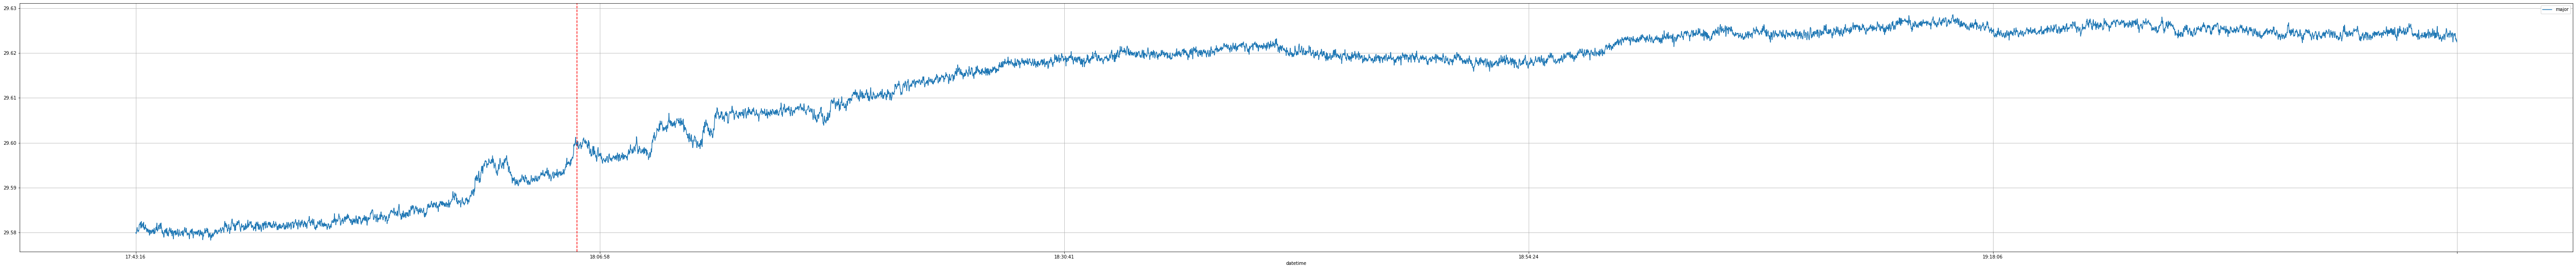

In [68]:
"""
#test.ipynb
"""
from datetime import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

# Importing the dataset
#dataset = pd.read_table('log17-event.csv', delimiter =",")
df = pd.read_table('./log17.csv', delimiter =",")
X = df.iloc[:, :-1].values
y = df.iloc[:, 3].values


#clean and inspect the data
print(df.head(10))
print(df.dtypes)
df.columns
df.columns = df.columns.str.replace(' ', '')


ax = df.plot(x="datetime", y=["pressure"], kind="line", figsize=(100, 10), grid=True)
#df.plot(x="datetime", y=["humidity"], kind="line", figsize=(100, 10), ax=ax)

#ax.axvline(x='', color='b', linestyle='--', label='start')
ax.axvline(x=df.index.searchsorted("18:21:20"), color='r', linestyle='--', label='major')
#ax.axvline(x='18:56:10', color='r', linestyle='--', label='MinorEvent')


h,labels = ax.get_legend_handles_labels()
labels[:2] = ['major']
ax.legend(labels=labels)

plt.show()



In [ ]:
#plot the data 
df.plot(x="datetime", y=["temp"], kind="line", figsize=(10, 9))
df.plot(x="datetime", y=["humidity"], kind="line", figsize=(10, 9))
df.plot(x="datetime", y=["pressure"], kind="line", figsize=(10, 9))
df.plot(x="datetime", y=["pitch"], kind="line", figsize=(10, 9))
df.plot(x="datetime", y=["roll"], kind="line", figsize=(10, 9))
df.plot(x="datetime", y=["yaw"], kind="line", figsize=(10, 9))
df.plot(x="datetime", y=["accel_x"], kind="line", figsize=(10, 9))
df.plot(x="datetime", y=["accel_y"], kind="line", figsize=(10, 9))
df.plot(x="datetime", y=["accel_z"], kind="line", figsize=(10, 9))
df.plot(x="datetime", y=["Unnamed:10"], kind="line", figsize=(10, 9))

In [ ]:
#plot using plt and add vertical lines for the events in question





In [ ]:

#GPT3 - fails#

# # Taking care of missing data
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean') #, axis = 0)
# imputer = imputer.fit(X[:, 1:3])
# X[:, 1:3] = imputer.transform(X[:, 1:3])

# # Encoding categorical data
# # Encoding the Independent Variable
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelencoder_X = LabelEncoder()
# X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
# onehotencoder = OneHotEncoder(categorical_features = [0])
# X = onehotencoder.fit_transform(X).toarray()
# # Encoding the Dependent Variable
# labelencoder_y = LabelEncoder()
# y = labelencoder_y.fit_transform(y)

# # Splitting the dataset into the Training set and Test set
# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)
# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train)



In [8]:
# """
# display a line graph of each column in a single chart with unique colors for each line.
# GPT3 - untested
# """


# # Splitting the dataset into the Training set and Test set
# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# # Feature Scaling
# """from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)
# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train)"""

# # Fitting Multiple Linear Regression to the Training set
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)

# # Predicting the Test set results
# y_pred = regressor.predict(X_test)

# # Building the optimal model using Backward Elimination
# import statsmodels.formula.api as sm
# X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)
# X_opt = X[:, [0, 1, 2, 3, 4, 5]]
# regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
# regressor_OLS.summary()
# X_opt = X[:, [0, 1, 3, 4, 5]]
# regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
# regressor_OLS.summary()
# X_opt = X[:, [0, 3, 4, 5]]
# regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
# regressor_OLS.summary()
# X_opt = X[:, [0, 3, 5]]
# regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
# regressor_OLS.summary()
# X_opt = X[:, [0, 3]]
# regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
# regressor_OLS.summary()

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [ ]:
# """
# #test.ipynb

# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

# # Importing the dataset
# dataset = pd.read_csv('Data.csv')
# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, 3].values
# print dataset.head(10)
# """
# returns
#  datetime      temp   humidity   pressure      pitch      roll        yaw  \
# 0  18:20:00  54.38752   37.53134   29.61087  357.51255  12.62688  133.25252   
# 1  18:20:00  54.24114   37.36535   29.61183  357.56076  12.63828  133.20820   
# 2  18:20:01  54.36922   37.75798   29.61149  357.57236  12.66694  133.21496   
# 3  18:20:02  54.22284   37.30151   29.61069  357.58288  12.64408  133.25142   
# 4  18:20:02  54.22284   37.52815   29.61119  357.58245  12.64532  133.24769   
# 5  18:20:03  54.22284   37.49303   29.61054  357.60286  12.63064  133.24359   
# 6  18:20:04  54.55220   39.10824   29.61013  357.60336  12.61431  133.16406   
# 7  18:20:05  54.22284   37.55050   29.61073  357.56437  12.63878  133.15824   
# 8  18:20:05  53.94838   37.55688   29.61127  357.58280  12.60414  133.16536   
# 9  18:20:06  54.18625   37.10360   29.61096  357.62394  12.54210  133.16272   

#     accel_x   accel_y   accel_z  Unnamed: 10  
# 0   0.04219   0.21730   0.99745          NaN  
# 1   0.04267   0.21730   0.93506          NaN  
# 2   0.04219   0.21706   0.93433          NaN  
# 3   0.04291   0.21706   0.87341          NaN  
# 4   0.04291   0.21681   0.93385          NaN  
# 5   0.04194   0.21657   0.93312          NaN  
# 6   0.04122   0.21803   0.93433          NaN  
# 7   0.04364   0.21730   0.93360          NaN  
# 8   0.04267   0.21706   0.93287          NaN  
# 9   0.04340   0.21730   0.93068          NaN  
# """
# """
# plot each column in a chart with datetime as the x-axis
# """


# # Importing the dataset
# dataset = pd.read_csv('Data.csv')
# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, 3].values

# # Splitting the dataset into the Training set and Test set
# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# # Feature Scaling
# """from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)
# sc_y = StandardScaler()
# y_train = sc_y.fit_transform(y_train)"""

# # Fitting Multiple Linear Regression to the Training set
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)

# # Predicting the Test set results
# y_pred = regressor.predict(X_test)

# # Visualising the Training set results
# plt.scatter(X_train, y_train, color = 'red')
# plt.plot(X_train, regressor.predict(X_train), color = 'blue')
# plt.title('Humidity vs Temperature (Training set)')
# plt.xlabel('Humidity')
# plt.ylabel('Temperature')
# plt.show()

# # Visualising the Test set results
# plt.scatter(X_test, y_test, color = 'red')
# plt.plot(X_train, regressor.predict(X_train), color = 'blue')
# plt.title('Humidity vs Temperature (Test set)')
# plt.xlabel('Humidity')
# plt.ylabel('Temperature')
# plt.show()

# # Visualising the predicted results
# plt.scatter(X_test, y_pred, color = 'red')
# plt.plot(X_train, regressor.predict(X_train), color = 'blue')
# plt.title('Humidity vs Temperature (Predicted set)')
# plt.xlabel('Humidity')
# plt.ylabel('Temperature')
# plt.show()

# # Visualising the predicted results
# plt.scatter(X_test, y_pred, color = 'red')
# plt.plot(X_train, regressor.predict(X_train), color = 'blue')
# plt.title('Humidity vs Temperature (Predicted set)')
# plt.xlabel('Humidity')
# plt.ylabel('Temperature')
# plt.show()

# # Visualising the predicted results
# plt.scatter(X_test, y_pred, color = 'red')
# plt.plot(X_train, regressor.predict(X_train), color = 'blue')
# plt.title('Humidity vs Temperature (Predicted set)')
# plt.xlabel('Humidity')
# plt.ylabel('Temperature')
# plt.show()

# # Visualising the predicted results
# plt.scatter(X_test, y_pred, color = 'red')
# plt.plot(X_train, regressor.predict(X_train), color = 'blue')
# plt.title('Humidity vs Temperature (Predicted set)')
# plt.xlabel('Humidity')
# plt.ylabel('Temperature')
# plt.show()

# # Visualising the predicted results
# plt.scatter(X_test, y_pred, color = 'red')
# plt.plot(X_train, regressor.predict(X_train), color = 'blue')
# plt.title('Humidity vs Temperature (Predicted set)')
# plt.xlabel('Humidity')
# plt.ylabel('Temperature')
# plt.show()

# # Visualising the predicted results
# plt.scatter(X_test, y_pred, color = 'red')
# plt.plot(X_train, regressor.predict(X_train), color = 'blue')
# plt.title('Humidity vs Temperature (